In [38]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
%cd "/content/drive/MyDrive/8° Semestre/IA M2 Benji"
!ls

/content/drive/MyDrive/8° Semestre/IA M2 Benji
 augmented  'Copia de Model Tunning.ipynb'   Dataset2_1   images


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Dataset2_1'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')

def to_grayscale(image):
    # Convert RGB image to grayscale
    gray_image = tf.image.rgb_to_grayscale(image)
    return gray_image

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 60,
						#	width_shift_range = 0.2,
						#	height_shift_range = 0.2,
						#	shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,
							preprocessing_function=to_grayscale
							)

para ello tenemos que asignar una fuente base de imágenes a modificar, en este caso tomamos las de el directorio de train, en este caso solo estamos tomando una imagen y estamos mostrando como se generarían 5 imágenes diferentes:

Found 28000 images belonging to 28 classes.


<Figure size 640x480 with 0 Axes>

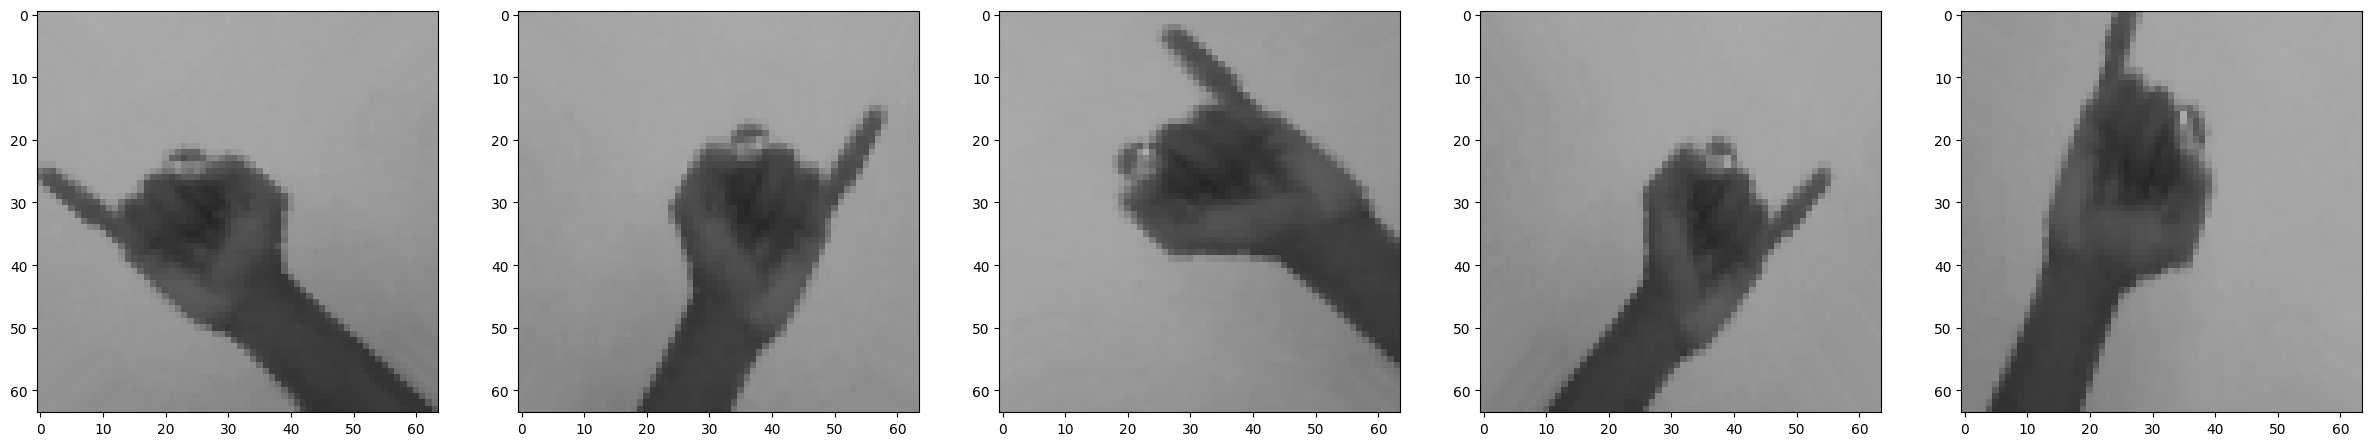

In [41]:
import matplotlib.pyplot as plt

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (64, 64),
							batch_size = 1,
							#class_mode ='binary',
							class_mode ='categorical',
							)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0], cmap='gray')

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 28000 images belonging to 28 classes.
(8, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

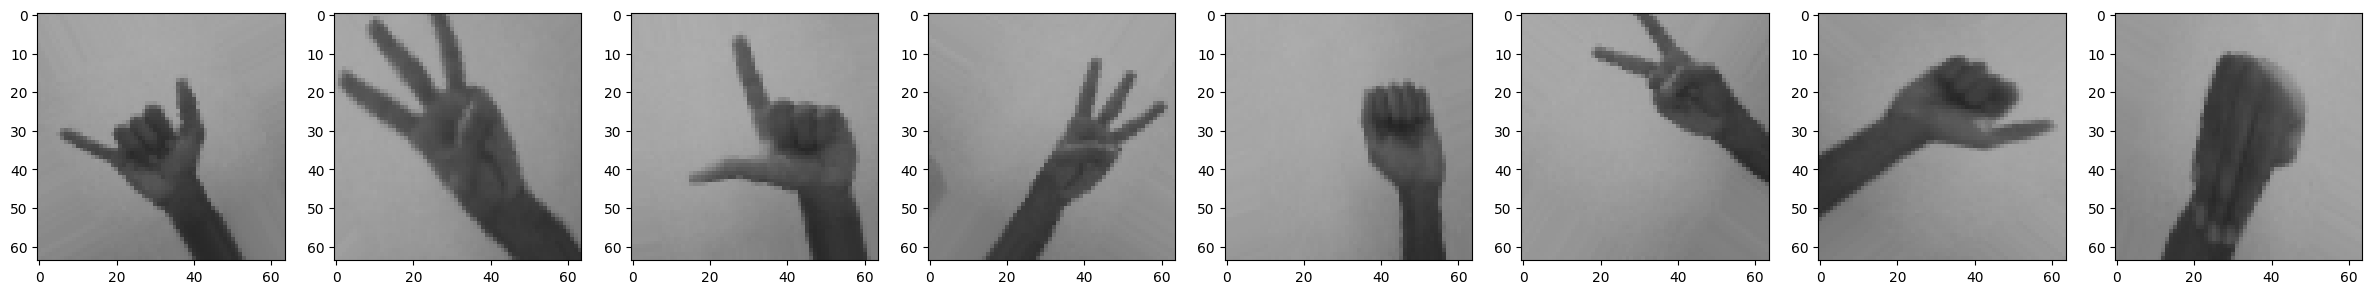

In [42]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (64, 64),
							batch_size = 8,
							#class_mode ='binary',
							class_mode ='categorical',
							)

images , labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])


También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo.

In [ ]:
"""path = "/content/drive/MyDrive/8° Semestre/IA M2 Benji/Dataset2_1"

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							#class_mode ='binary',
							class_mode ='categorical',
							save_to_dir= path + '/Augmented',
              save_prefix='aug',
              save_format='png'
							)"""

'path = "/content/drive/MyDrive/8° Semestre/IA M2 Benji/Dataset2_1"\n\ntrain_generator = train_datagen.flow_from_directory(\n\t\t\t\t\t\t\ttrain_dir,\n\t\t\t\t\t\t\ttarget_size = (150, 150),\n\t\t\t\t\t\t\tbatch_size = 8,\n\t\t\t\t\t\t\t#class_mode =\'binary\',\n\t\t\t\t\t\t\tclass_mode =\'categorical\',\n\t\t\t\t\t\t\tsave_to_dir= path + \'/Augmented\',\n              save_prefix=\'aug\',\n              save_format=\'png\'\n\t\t\t\t\t\t\t)'

Esta es una red neuronal convolutiva:

In [ ]:
from tensorflow.keras import optimizers, callbacks
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
#model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape = (64, 64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape = (64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu", input_shape = (64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation="relu", input_shape = (64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation="relu", input_shape = (64,64,3)))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
#model.add(layers.Dense(1,activation='sigmoid'))
model.add(layers.Dense(28, activation='softmax'))

model.summary()

"""model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])"""
model.compile(loss = "categorical_crossentropy", optimizer=optimizers.Adam(2e-5), metrics=['accuracy'])


In [63]:
class LRTuningCallback(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.lr = []
        self.loss = []

    def on_epoch_end(self, epoch, logs=None):
        current_lr = self.model.optimizer.lr
        current_loss = logs.get('loss')
        self.lr.append(current_lr)
        self.loss.append(current_loss)

In [69]:
history = model.fit(
						train_generator,
						epochs = 10)

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

plt.plot(lr_tuning_callback.lr, lr_tuning_callback.loss)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

plt.title('Learning Rate Range Test Curve')
plt.show()

Epoch 1/20
  23/3500 [..............................] - ETA: 9:32 - loss: nan - accuracy: 0.0163

KeyboardInterrupt: 

In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (64, 64),
					batch_size = 20,
					#class_mode= 'binary')
					class_mode ='categorical')

test_loss, test_acc = model.evaluate(test_generator)
print('\ntest acc :\n', test_acc)


Found 112 images belonging to 28 classes.
6/6 [==============================] - 1s 124ms/step - loss: 530.7909 - accuracy: 0.1875

test acc :
 0.1875


In [ ]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]


predictions = model.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x
test_labels_int = np.argmax(test_labels, axis=1)

1/1 [==============================] - 0s 151ms/step


In [ ]:
print('Model         ', 'test loss            ', ' test accuracy ')
print('Original      ', test_loss, '   ', test_acc)
#print('More Layers   ', test_loss_cnn, '   ', test_acc_cnn)
#print('Transfer VGG  ', test_loss_vgg, '  ', test_acc_vgg)


from tensorflow.math import confusion_matrix

mat = confusion_matrix(classes_x, test_labels_int)
print('         ', 'label neg ', ' label pos')
print('pred neg    ', np.array(mat[0][0]), "        ", np.array(mat[0][1]))
print('pred pos    ', np.array(mat[1][0]), "         ", np.array(mat[1][1]))

Model          test loss              test accuracy 
Original       530.7908935546875     0.1875
          label neg   label pos
pred neg     0          0
pred pos     0           0


1 model.save("hermno.keras")

model = models.load_model(hermno.keras)